In [3]:
import os
import numpy as np
from PIL import Image
import rasterio
from rasterio.windows import Window

# === CONFIG ===
IMAGE_DIR = r"C:\Users\wasif\Desktop\Augmented_Full\images"
MASK_DIR = r"C:\Users\wasif\Desktop\Augmented_Full\masks"
OUT_IMG_DIR = r"C:\Users\wasif\Desktop\Augmented_Full\cropped_land_strict\images"
OUT_MASK_DIR = r"C:\Users\wasif\Desktop\Augmented_Full\cropped_land_strict\masks"

CROP_SIZE = 256
TARGET_CROPS = 2000

# === SETUP ===
os.makedirs(OUT_IMG_DIR, exist_ok=True)
os.makedirs(OUT_MASK_DIR, exist_ok=True)

crop_counter = 0

# === PROCESS MASKS & IMAGES ===
for mask_file in os.listdir(MASK_DIR):
    if not mask_file.endswith(".png"):
        continue

    base_name = os.path.splitext(mask_file)[0]
    mask_path = os.path.join(MASK_DIR, mask_file)
    image_path = os.path.join(IMAGE_DIR, f"{base_name}.jp2")

    if not os.path.exists(image_path):
        print(f"❌ Image not found for: {mask_file}, skipping.")
        continue

    print(f"📂 Processing: {mask_file}")

    mask = np.array(Image.open(mask_path).convert("L"))

    with rasterio.open(image_path) as src:
        if mask.shape != (src.height, src.width):
            print(f"⚠️ Dimension mismatch for {base_name}, skipping.")
            continue

        for row in range(0, src.height - CROP_SIZE + 1, CROP_SIZE):
            if crop_counter >= TARGET_CROPS:
                break

            for col in range(0, src.width - CROP_SIZE + 1, CROP_SIZE):
                if crop_counter >= TARGET_CROPS:
                    break

                mask_crop = mask[row:row + CROP_SIZE, col:col + CROP_SIZE]

                if np.all(mask_crop == 255):  # 100% land
                    window = Window(col, row, CROP_SIZE, CROP_SIZE)
                    img_crop = src.read(window=window)

                    # Save image
                    img_out_path = os.path.join(OUT_IMG_DIR, f"{base_name}_landcrop_{crop_counter:05d}.jp2")
                    with rasterio.open(
                        img_out_path, "w",
                        driver="JP2OpenJPEG",
                        height=CROP_SIZE,
                        width=CROP_SIZE,
                        count=img_crop.shape[0],
                        dtype=img_crop.dtype,
                        crs=src.crs,
                        transform=rasterio.windows.transform(window, src.transform),
                    ) as dst:
                        dst.write(img_crop)

                    # Save mask
                    mask_out_path = os.path.join(OUT_MASK_DIR, f"{base_name}_landcrop_{crop_counter:05d}.png")
                    Image.fromarray(mask_crop).save(mask_out_path)

                    print(f"✅ Saved: {base_name}_landcrop_{crop_counter:05d}")
                    crop_counter += 1

print(f"\n🎯 Done. Total 100% land crops saved: {crop_counter}")


📂 Processing: Image_10_mixed_aug0.png
✅ Saved: Image_10_mixed_aug0_landcrop_00000
✅ Saved: Image_10_mixed_aug0_landcrop_00001
✅ Saved: Image_10_mixed_aug0_landcrop_00002
✅ Saved: Image_10_mixed_aug0_landcrop_00003
✅ Saved: Image_10_mixed_aug0_landcrop_00004
✅ Saved: Image_10_mixed_aug0_landcrop_00005
✅ Saved: Image_10_mixed_aug0_landcrop_00006
✅ Saved: Image_10_mixed_aug0_landcrop_00007
✅ Saved: Image_10_mixed_aug0_landcrop_00008
✅ Saved: Image_10_mixed_aug0_landcrop_00009
✅ Saved: Image_10_mixed_aug0_landcrop_00010
✅ Saved: Image_10_mixed_aug0_landcrop_00011
✅ Saved: Image_10_mixed_aug0_landcrop_00012
✅ Saved: Image_10_mixed_aug0_landcrop_00013
✅ Saved: Image_10_mixed_aug0_landcrop_00014
✅ Saved: Image_10_mixed_aug0_landcrop_00015
✅ Saved: Image_10_mixed_aug0_landcrop_00016
✅ Saved: Image_10_mixed_aug0_landcrop_00017
✅ Saved: Image_10_mixed_aug0_landcrop_00018
✅ Saved: Image_10_mixed_aug0_landcrop_00019
✅ Saved: Image_10_mixed_aug0_landcrop_00020
✅ Saved: Image_10_mixed_aug0_landcrop_

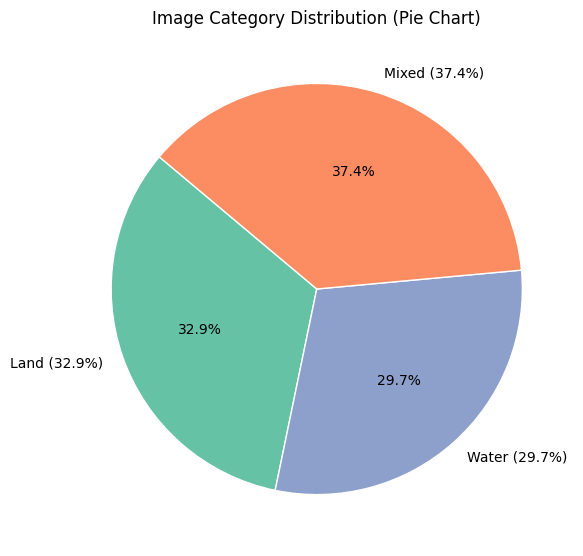

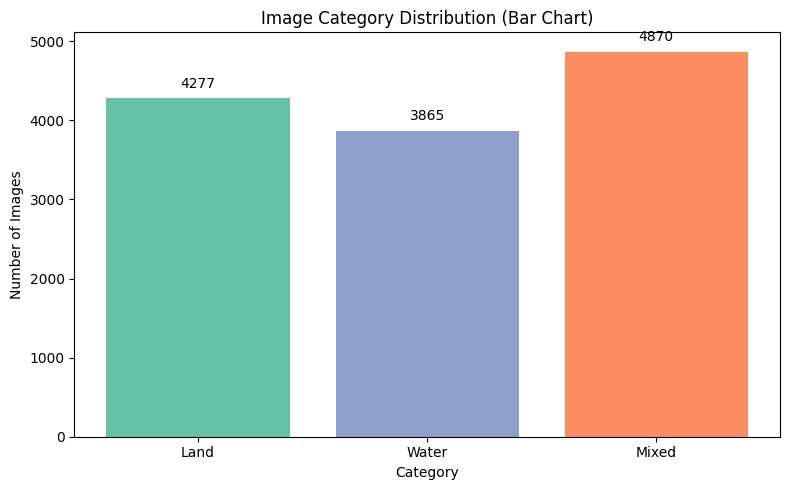

In [1]:
import matplotlib.pyplot as plt

# Data
labels = ['Land', 'Water', 'Mixed']
counts = [4277, 3865, 4870]
colors = ['#66c2a5', '#8da0cb', '#fc8d62']  # Optional: custom colors

# Calculate percentages
total = sum(counts)
percentages = [count / total * 100 for count in counts]

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=[f'{l} ({p:.1f}%)' for l, p in zip(labels, percentages)],
        colors=colors, startangle=140, autopct='%.1f%%', wedgeprops=dict(edgecolor='w'))
plt.title('Image Category Distribution (Pie Chart)')
plt.tight_layout()
plt.show()

# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=colors)
plt.title('Image Category Distribution (Bar Chart)')
plt.xlabel('Category')
plt.ylabel('Number of Images')
for i, count in enumerate(counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()
